# **Integração de IA e RA para Manutenção Preditiva na ISS**

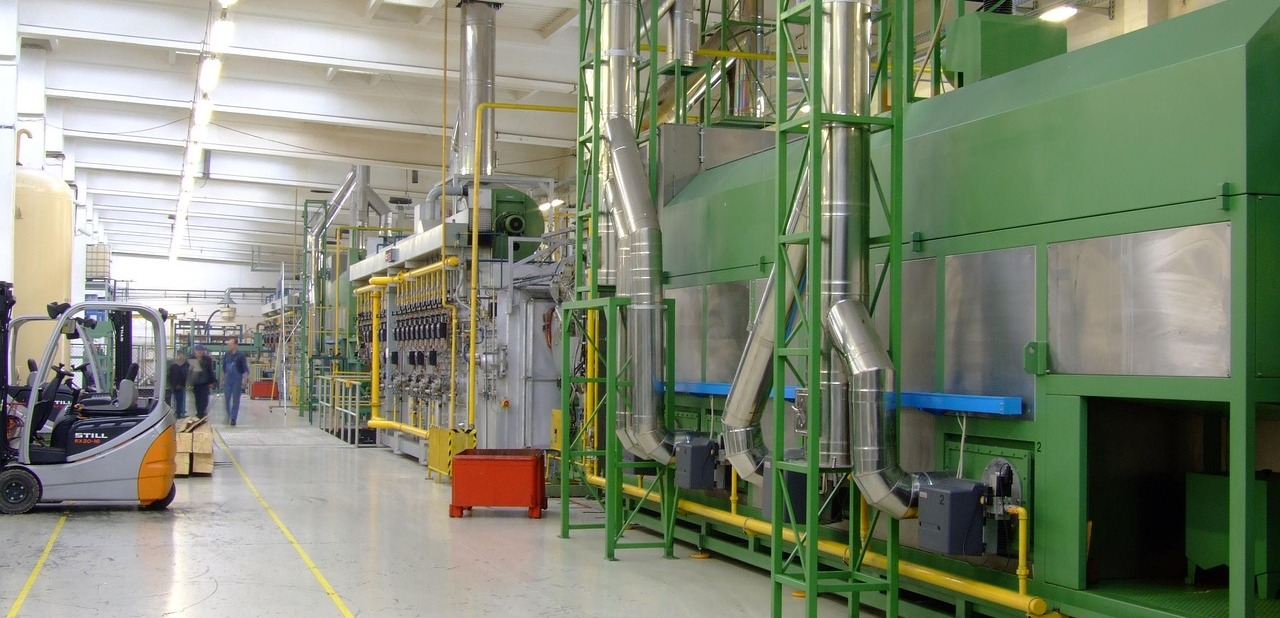

##**Contextualização**

Uma agência aeroespacial (ex: NASA ou parceira comercial) solicitou o desenvolvimento de um sistema de Manutenção Inteligente e Assistida (AMIA) para monitorar componentes rotativos críticos a bordo da Estação Espacial Internacional (ISS), como Control Moment Gyros (giroscópios) e bombas de sistemas de suporte à vida.

Devido à impossibilidade de usar dados reais classificados da ISS em fase de desenvolvimento, a agência forneceu o AI4I 2020 Predictive Maintenance Dataset como um análogo de alta fidelidade para validação (Simulação). Este conjunto contém dados de telemetria simulando estresses mecânicos e térmicos em equipamentos rotativos.

### **Campos** e **Descrições**

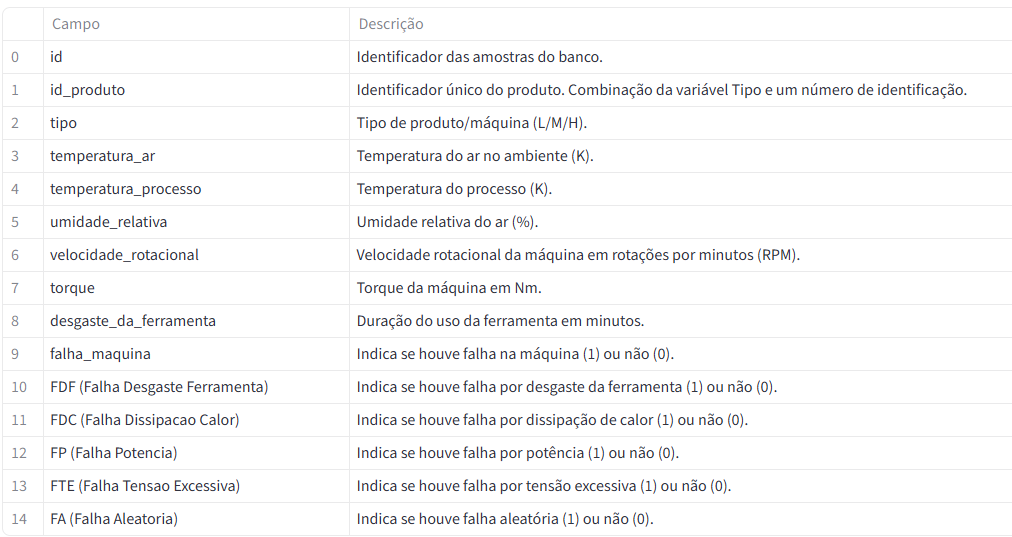


# 1 Introdução

O desafio consiste em criar um sistema de **manutenção preditiva** capaz de prever falhas em máquinas a partir de dados coletados por sensores IoT. Além de prever se haverá falha, buscamos identificar **qual tipo de falha** ocorreu.

Isso permite que a empresa atue de forma proativa, reduzindo custos com manutenção corretiva e aumentando a eficiência operacional.

# 2. Exploração Inicial

Começamos com uma análise exploratória automatizada usando ydata-profiling, o que nos permite identificar rapidamente:

*   Distribuição das variáveis
*   Valores ausentes
*   Correlações iniciais
*   Potenciais outliers

Essa etapa cria o primeiro mapa do terreno, destacando os principais desafios dos dados.


# 3. Preparação dos Dados

Após conhecer os dados, aplicamos técnicas de pré-processamento:



*   Escalonamento de variáveis (StandardScaler)
*   Codificação de categorias (LabelEncoder)
*   Tratamento de outliers (IsolationForest, métodos estatísticos)
*   Balanceamento das classes com SMOTE, essencial para lidar com desbalanceamentos que poderiam enviesar os modelos.

O objetivo é garantir que os modelos recebam dados limpos, consistentes e comparáveis.


# 4. Modelagem

Exploramos diferentes algoritmos de aprendizado supervisionado, cada um com suas características:

*   Modelos lineares: LogisticRegression, SGDClassifier
*   Árvores e ensembles: RandomForest, GradientBoosting, AdaBoost, Bagging, DecisionTree
*   Métodos baseados em vizinhança: KNeighborsClassifier
*   Modelos mais sofisticados: SVC

Também utilizamos baselines simples (DummyClassifier) para termos uma referência inicial e entender quanto os modelos realmente agregam valor.


5. Avaliação

Comparamos os modelos usando métricas robustas:


*   Acurácia (desempenho geral)
*   F1-score (equilíbrio entre precisão e recall)
*   ROC-AUC e curvas ROC
*   Curvas de Precisão-Recall (importantes em cenários desbalanceados)
*   Matrizes de confusão para detalhar acertos e erros

Essas métricas nos permitem compreender não apenas “quem acerta mais”, mas como os modelos erram — ponto crucial para decisões de negócio.

# 6. Reprodutibilidade e Rastreamento

Por fim, utilizamos MLflow para rastrear experimentos, registrando:


*   Parâmetros dos modelos
*   Métricas de avaliação
*   Artefatos gerados (gráficos, relatórios)

Isso garante transparência, reprodutibilidade e escalabilidade, permitindo que futuros experimentos sejam comparados de forma estruturada.


# 7. Conclusão

Ao longo desta jornada:

*   Exploramos os dados e entendemos seus desafios.
*   Preparamos o conjunto para modelagem, cuidando de outliers e desbalanceamento.
*   Testamos múltiplos algoritmos, sempre comparando com um baseline.
*   Avaliamos com métricas robustas, entendendo pontos fortes e fracos de cada modelo.
*   Registramos os resultados com MLflow, consolidando boas práticas de MLOps.










# **Exploração Inicial dos Dados**


Nesta etapa, buscamos compreender melhor o conjunto de dados antes de aplicar qualquer modelo de machine learning.  
A exploração inicial inclui:  

- **Carregamento e inspeção** das primeiras linhas para conhecer a estrutura.  
- **Verificação de valores ausentes** e tratamento de inconsistências.  
- **Estatísticas descritivas** (média, mediana, desvio padrão, etc.) para identificar padrões e possíveis anomalias.  
- **Distribuição das variáveis** numéricas e categóricas, auxiliando na detecção de desbalanceamentos.  
- **Visualizações gráficas** (histogramas, boxplots, correlações) para entender relações entre variáveis.  
- **Relatório automatizado** com o `ydata-profiling`, que resume as principais características dos dados de forma clara.  

O objetivo desta etapa é **criar um panorama confiável do dataset**, garantindo que os próximos passos do pré-processamento e modelagem partam de uma base sólida.  


In [1]:
!pip install -q ydata-profiling mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/10

In [2]:
# Grupo 1: Configuração e manipulação básica
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Grupo 2: Estatística e pré-processamento avançado
from scipy import stats
from sklearn.svm import SVC
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.multioutput import MultiOutputClassifier

# Grupo 3: MLops e análise exploratória
import mlflow
import mlflow.sklearn
from sklearn.ensemble import IsolationForest
from ydata_profiling import ProfileReport

# Grupo 4: Pré-processamento e balanceamento
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.multioutput import MultiOutputClassifier

# Grupo 5: Algoritmos de machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Grupo 6: Métricas de avaliação
from sklearn.metrics import (
    classification_report,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    accuracy_score,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/Amia_train.csv')

In [4]:
df.head(3)

id id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
0   0     L56434    L           298.3                 309.1              90.0   
1   1     L48741    L           298.2                 308.4              90.0   
2   2     L48850    L           298.2                 307.8              90.0   

   velocidade_rotacional  torque  desgaste_da_ferramenta falha_maquina  \
0                 1616.0    31.1                   195.0           não   
1                 1388.0    53.8                   137.0           Não   
2                 1528.0    31.1                     NaN           Não   

  FDF (Falha Desgaste Ferramenta) FDC (Falha Dissipacao Calor)  \
0                           False                        False   
1                           False                        False   
2                               N                        False   

  FP (Falha Potencia)  FTE (Falha Tensao Excessiva) FA (Falha Aleatoria)  
0                 Não                         False                  Não  
1                 Não                         False                  Não  
2                 Não                         False                  Não

In [5]:
df.shape

(35260, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35260 entries, 0 to 35259
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               35260 non-null  int64  
 1   id_produto                       35260 non-null  object 
 2   tipo                             35260 non-null  object 
 3   temperatura_ar                   34644 non-null  float64
 4   temperatura_processo             34661 non-null  float64
 5   umidade_relativa                 35260 non-null  float64
 6   velocidade_rotacional            34509 non-null  float64
 7   torque                           34637 non-null  float64
 8   desgaste_da_ferramenta           34308 non-null  float64
 9   falha_maquina                    35260 non-null  object 
 10  FDF (Falha Desgaste Ferramenta)  35260 non-null  object 
 11  FDC (Falha Dissipacao Calor)     35260 non-null  object 
 12  FP (Falha Potencia

In [7]:
df.describe()

id  temperatura_ar  temperatura_processo  umidade_relativa  \
count  35260.000000    34644.000000          34661.000000      35260.000000   
mean   17629.500000      269.535241            280.457676         89.997672   
std    10178.829582       96.342224             96.943630          0.142191   
min        0.000000      -36.000000            -38.000000         80.590429   
25%     8814.750000      297.900000            308.500000         90.000000   
50%    17629.500000      299.600000            309.800000         90.000000   
75%    26444.250000      301.100000            310.900000         90.000000   
max    35259.000000      304.500000            313.800000         94.575256   

       velocidade_rotacional        torque  desgaste_da_ferramenta  
count           34509.000000  34637.000000            34308.000000  
mean             1380.194181     40.210357               74.373266  
std               494.098759      8.831626              110.411937  
min              -161.000000      3.800000             -202.000000  
25%              1408.000000     34.300000               28.000000  
50%              1483.000000     40.300000               94.000000  
75%              1574.000000     46.200000              155.000000  
max              2886.000000     76.600000              253.000000

In [8]:
df.nunique()

id                                 35260
id_produto                          9708
tipo                                   3
temperatura_ar                        94
temperatura_processo                  83
umidade_relativa                      36
velocidade_rotacional                916
torque                               579
desgaste_da_ferramenta               247
falha_maquina                          8
FDF (Falha Desgaste Ferramenta)        6
FDC (Falha Dissipacao Calor)           6
FP (Falha Potencia)                    8
FTE (Falha Tensao Excessiva)           2
FA (Falha Aleatoria)                   7
dtype: int64

In [9]:
df.isnull().sum()

id                                   0
id_produto                           0
tipo                                 0
temperatura_ar                     616
temperatura_processo               599
umidade_relativa                     0
velocidade_rotacional              751
torque                             623
desgaste_da_ferramenta             952
falha_maquina                        0
FDF (Falha Desgaste Ferramenta)      0
FDC (Falha Dissipacao Calor)         0
FP (Falha Potencia)                  0
FTE (Falha Tensao Excessiva)         0
FA (Falha Aleatoria)                 0
dtype: int64

#  Descrição dos Dados
O dataset contém medições de sensores em diferentes máquinas. As principais variáveis são:

- **id_produto**: identificador único da máquina
- **tipo**: tipo da máquina (L, M, H)
- **temperatura_ar**: temperatura ambiente (K)
- **temperatura_processo**: temperatura do processo (K)
- **umidade_relativa**: umidade do ar (%)
- **velocidade_rotacional**: rotações por minuto (RPM)
- **torque**: torque da máquina (Nm)
- **desgaste_da_ferramenta**: duração de uso em minutos

O alvo são as variáveis de falha:
- **falha_maquina** (1/0)
- Tipos de falha: **FDF, FDC, FP, FTE, FA**

Essas informações permitem tratar o problema como classificação multiclasse ou multirrótulo.

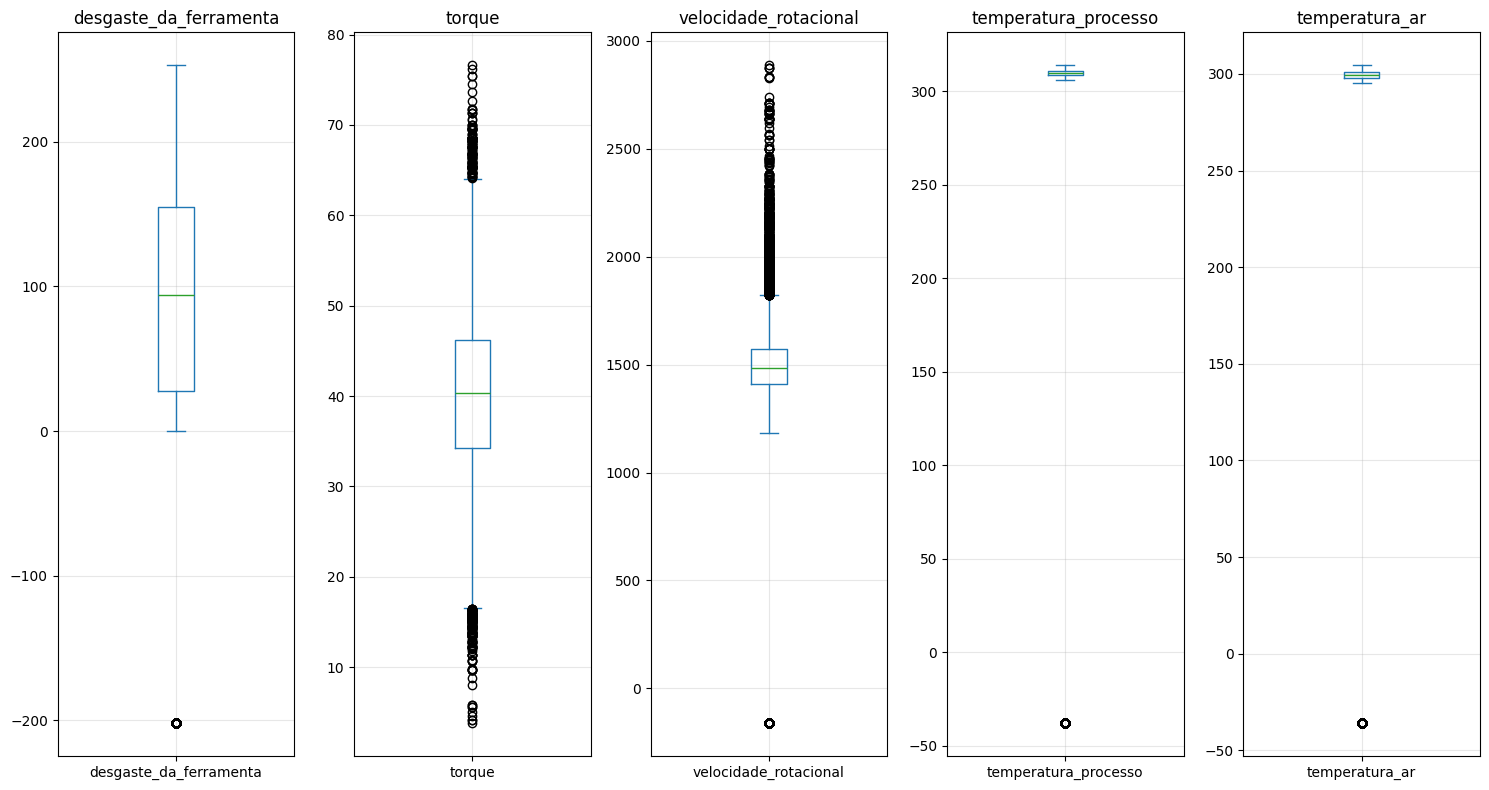

In [10]:
variaveis = ['desgaste_da_ferramenta', 'torque', 'velocidade_rotacional',
             'temperatura_processo', 'temperatura_ar']

plt.figure(figsize=(15, 8))

for i, var in enumerate(variaveis, 1):
    plt.subplot(1, 5, i)
    df[var].plot.box()
    plt.title(f'{var}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

*   As variáveis temperatura_processo e temperatura_ar estão quase constantes, sugerindo pouco poder discriminativo para modelos de machine learning, mas precisam ser mantidas para análise de correlação.

*   Há muitos outliers e valores inválidos (negativos em variáveis que não poderiam ser negativas), o que indica necessidade de limpeza e tratamento.

*   desgaste_da_ferramenta, torque e velocidade_rotacional parecem ser os atributos mais variáveis e provavelmente relevantes para explicar falhas.




In [11]:
print(df[variaveis].describe())

       desgaste_da_ferramenta        torque  velocidade_rotacional  \
count            34308.000000  34637.000000           34509.000000   
mean                74.373266     40.210357            1380.194181   
std                110.411937      8.831626             494.098759   
min               -202.000000      3.800000            -161.000000   
25%                 28.000000     34.300000            1408.000000   
50%                 94.000000     40.300000            1483.000000   
75%                155.000000     46.200000            1574.000000   
max                253.000000     76.600000            2886.000000   

       temperatura_processo  temperatura_ar  
count          34661.000000    34644.000000  
mean             280.457676      269.535241  
std               96.943630       96.342224  
min              -38.000000      -36.000000  
25%              308.500000      297.900000  
50%              309.800000      299.600000  
75%              310.900000      301.100000  
m

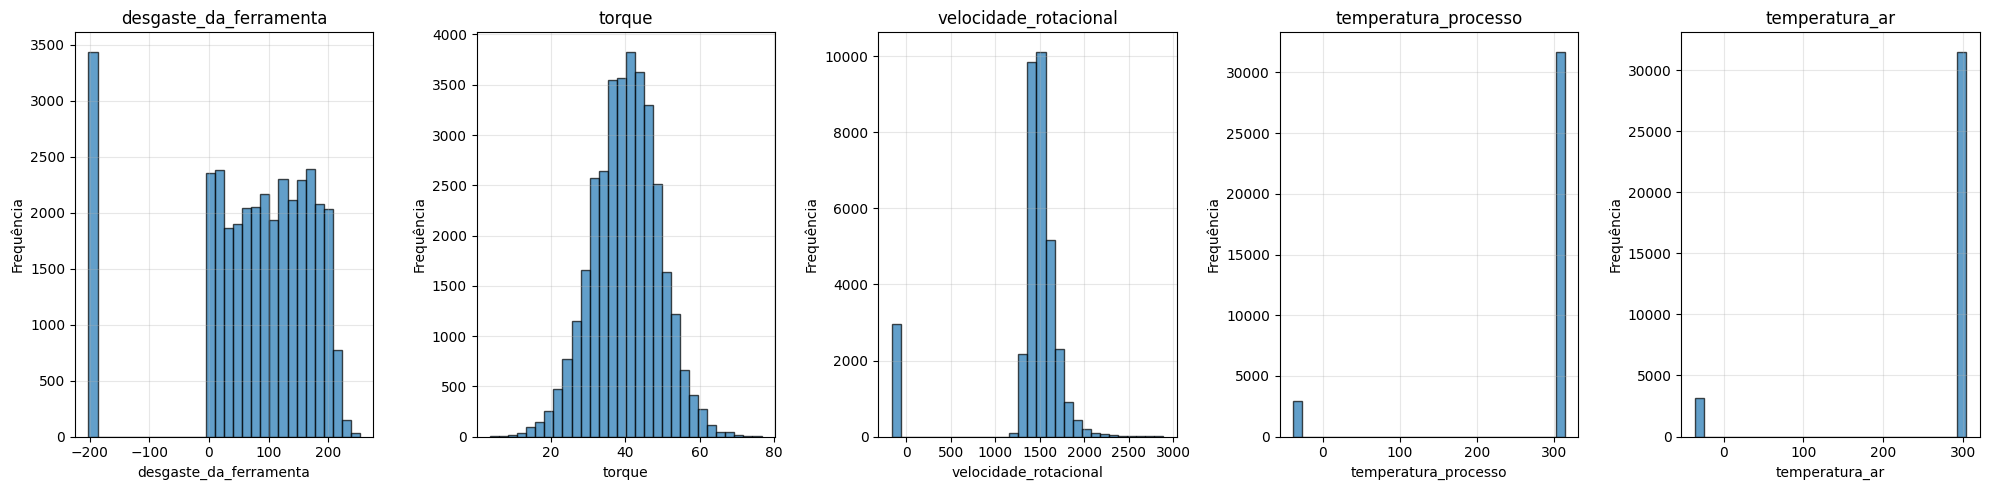

In [12]:
plt.figure(figsize=(20, 5))

for i, var in enumerate(variaveis, 1):
    plt.subplot(1, 5, i)
    df[var].plot.hist(bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'{var}')
    plt.grid(True, alpha=0.3)
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

A partir dos histogramas:

*   desgaste_da_ferramenta → distribuição espalhada, com presença de valores negativos incoerentes (possíveis erros de registro).
*   torque → segue padrão aproximadamente normal, mas com cauda longa em valores extremos.
*   velocidade_rotacional → concentrada entre 1200 e 1800 rpm, mas com registros incomuns próximos de zero e acima de 2500.
*   temperatura_processo → altamente concentrada em ~310, com alguns valores inválidos próximos de zero ou negativos.
*   temperatura_ar → comportamento semelhante à temperatura de processo, muito estável em ~300, mas também com registros anômalos próximos de zero.

In [13]:
# Renomear colunas conforme solicitado
rename_map = {
    "FDF (Falha Desgaste Ferramenta)": "FDF",
    "FDC (Falha Dissipacao Calor)": "FDC",
    "FP (Falha Potencia)": "FP",
    "FTE (Falha Tensao Excessiva)": "FTE",
    "FA (Falha Aleatoria)": "FA",
}
df = df.rename(columns=rename_map).copy()

# Função para normalizar rótulos (0/1)
def normalize_label(x):
    s = str(x).strip().lower()
    if s in {"1", "sim", "s", "true", "verdadeiro", "y"}:
        return 1
    if s in {"0", "não", "nao", "n", "false", "falso", "-"}:
        return 0
    try:
        v = float(s)
        if v == 1: return 1
        if v == 0: return 0
    except:
        pass
    return None

# Aplicar normalização nas colunas de falha
falha_cols = [
    "falha_maquina",
    "FDF",
    "FDC",
    "FP",
    "FTE",
    "FA",
]

for c in falha_cols:
    if c in df.columns:
        df[c] = df[c].apply(normalize_label)

# TRATAMENTO DE VALORES NULOS/VAZIOS

# 1. Identificar valores problemáticos nas colunas numéricas
problematic_values = ["", " ", "N", "n", "nao", "não", "sim", "s", "y", "0", "1"]

# 2. Função para limpar valores numéricos
def clean_numeric_value(x):
    if pd.isna(x) or x in problematic_values or str(x).strip() in problematic_values:
        return np.nan
    try:
        return float(x)
    except:
        return np.nan

# 3. Colunas numéricas para tratamento
numeric_cols = [
    "temperatura_ar",
    "temperatura_processo",
    "umidade_relativa",
    "velocidade_rotacional",
    "torque",
    "desgaste_da_ferramenta"
]

# 4. Aplicar limpeza nas colunas numéricas
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_numeric_value)

In [14]:
# FUNÇÃO PARA TRATAR VALORES AUSENTES (NULOS)
def impute_missing_values(data):
    """
    Preenche valores ausentes em um DataFrame.
    - Colunas numéricas são preenchidas com a mediana.
    - Colunas categóricas (texto) são preenchidas com a moda.
    """
    print("🔎 Verificando e tratando valores ausentes...")
    for column in data.columns:
        if data[column].isnull().sum() > 0: # Checa se há nulos na coluna
            if data[column].dtype == 'object':
                # Preenche com a moda (valor mais frequente)
                mode_value = data[column].mode()[0]
                data[column].fillna(mode_value, inplace=True)
                print(f"   - Coluna '{column}' (categórica): Nulos preenchidos com a moda ('{mode_value}').")
            else:
                # Preenche com a mediana (valor central)
                median_value = data[column].median()
                data[column].fillna(median_value, inplace=True)
                print(f"   - Coluna '{column}' (numérica): Nulos preenchidos com a mediana ({median_value:.2f}).")
    print("✅ Valores ausentes tratados com sucesso.\n")
    return data

# Funções de detecção
def detect_outliers_iqr(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

# Função de tratamento
def cap_outliers_iqr(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    data_capped = data.copy()
    data_capped[column] = np.clip(data_capped[column], lower_bound, upper_bound)
    return data_capped

# Colunas numéricas
numeric_cols = ['temperatura_ar', 'temperatura_processo', 'velocidade_rotacional',
                'torque', 'desgaste_da_ferramenta', 'diferenca_termica', 'potencia_mecanica']
numeric_cols = [col for col in numeric_cols if col in df.columns]

# Detectar outliers
for col in numeric_cols:
    outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    outliers_zscore = detect_outliers_zscore(df, col)

    print(f"{col}:")
    print(f"  IQR: {len(outliers_iqr)} outliers")
    print(f"  Z-score: {len(outliers_zscore)} outliers")

# Aplicar tratamento
df_clean = df.copy()
for col in numeric_cols:
    df_clean = cap_outliers_iqr(df_clean, col)

print(f"\nDataset limpo: {df_clean.shape}")
print("Outliers tratados com sucesso!")

# Exportar dataset tratado
df_clean.to_csv('dataset_tratado.csv', index=False)
print("Dataset exportado como 'dataset_tratado.csv'")

temperatura_ar:
  IQR: 3132 outliers
  Z-score: 0 outliers
temperatura_processo:
  IQR: 2939 outliers
  Z-score: 0 outliers
velocidade_rotacional:
  IQR: 4217 outliers
  Z-score: 0 outliers
torque:
  IQR: 291 outliers
  Z-score: 0 outliers
desgaste_da_ferramenta:
  IQR: 3439 outliers
  Z-score: 0 outliers

Dataset limpo: (35260, 15)
Outliers tratados com sucesso!
Dataset exportado como 'dataset_tratado.csv'


In [15]:
ids = df["id"]

In [16]:
df = pd.read_csv('/content/dataset_tratado.csv')

In [17]:
df.groupby(['tipo' , 'falha_maquina'])['desgaste_da_ferramenta'].median()

tipo  falha_maquina
H     0                 96.0
      1                112.0
L     0                 94.0
      1                144.5
M     0                 95.0
      1                113.5
Name: desgaste_da_ferramenta, dtype: float64

In [18]:
# Colunas para excluir do tratamento
excluir = ['id', 'id_produto']

# Tratar numéricas com mediana
numericas = df.select_dtypes(include=['float64', 'int64']).columns
for col in numericas:
    if col not in excluir and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Tratar categóricas com moda
categoricas = df.select_dtypes(include=['object']).columns
for col in categoricas:
    if col not in excluir and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Tratamento concluído!")
print(df.isnull().sum())

Tratamento concluído!
id                        0
id_produto                0
tipo                      0
temperatura_ar            0
temperatura_processo      0
umidade_relativa          0
velocidade_rotacional     0
torque                    0
desgaste_da_ferramenta    0
falha_maquina             0
FDF                       0
FDC                       0
FP                        0
FTE                       0
FA                        0
dtype: int64


In [19]:
#creando novas feature
df['diferenca_termica']=df['temperatura_processo']-df['temperatura_ar']
df['potencia_mecanica']=np.round((df['torque']*df['velocidade_rotacional']* 2 * np.pi) / 60,4)

In [20]:
df

id id_produto tipo  temperatura_ar  temperatura_processo  \
0          0     L56434    L           298.3                 309.1   
1          1     L48741    L           298.2                 308.4   
2          2     L48850    L           298.2                 307.8   
3          3     M20947    M           300.9                 310.8   
4          4     L53849    L           293.1                 310.5   
...      ...        ...  ...             ...                   ...   
35255  35255     L54709    L           300.1                 311.4   
35256  35256     L54735    L           300.4                 311.3   
35257  35257     L54275    L           300.6                 304.9   
35258  35258     M18165    M           301.3                 310.4   
35259  35259     L53432    L           300.8                 310.3   

       umidade_relativa  velocidade_rotacional  torque  \
0                  90.0                 1616.0    31.1   
1                  90.0                 1388.0    53.8   
2                  90.0                 1528.0    31.1   
3                  90.0                 1599.0    33.0   
4                  90.0                 1571.0    33.9   
...                 ...                    ...     ...   
35255              90.0                 1634.0    34.2   
35256              90.0                 1597.0    36.2   
35257              90.0                 1485.0    35.8   
35258              90.0                 1577.0    37.3   
35259              90.0                 1438.0    44.1   

       desgaste_da_ferramenta  falha_maquina  FDF  FDC  FP  FTE  FA  \
0                       195.0              0    0    0   0    0   0   
1                       137.0              0    0    0   0    0   0   
2                        94.0              0    0    0   0    0   0   
3                         7.0              0    0    0   0    0   0   
4                        94.0              0    0    0   0    0   0   
...                       ...            ...  ...  ...  ..  ...  ..   
35255                    45.0              0    0    0   0    0   0   
35256                   112.0              0    0    0   0    0   0   
35257                    19.0              0    0    0   0    0   0   
35258                    43.0              0    0    0   0    0   0   
35259                   198.0              0    0    0   0    0   0   

       diferenca_termica  potencia_mecanica  
0                   10.8          5262.9636  
1                   10.2          7819.8849  
2                    9.6          4976.3665  
3                    9.9          5525.7473  
4                   17.4          5577.0495  
...                  ...                ...  
35255               11.3          5852.0331  
35256               10.9          6053.9957  
35257                4.3          5567.2163  
35258                9.1          6159.8359  
35259                9.5          6640.8870  

[35260 rows x 17 columns]

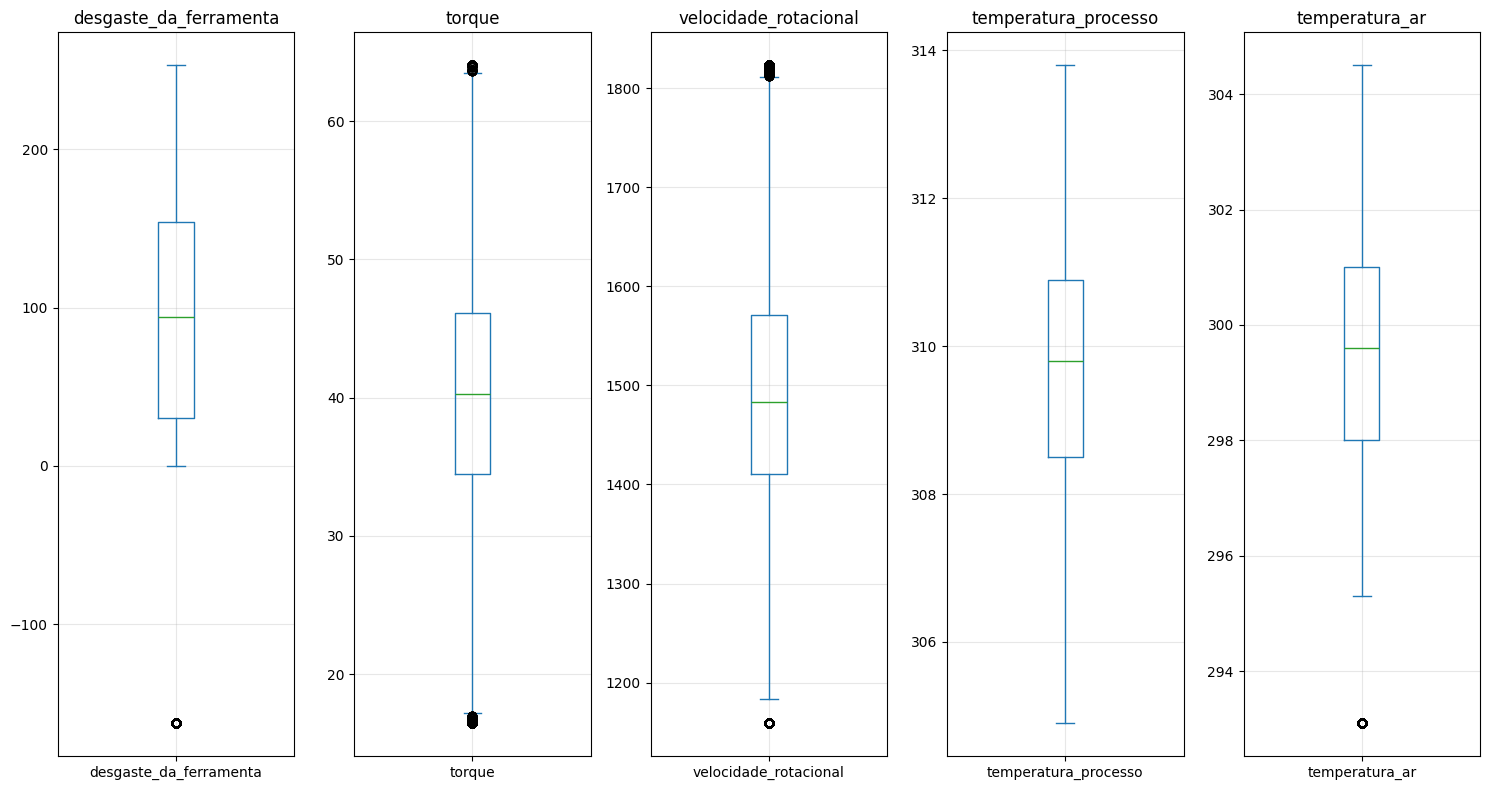

In [21]:
variaveis = ['desgaste_da_ferramenta', 'torque', 'velocidade_rotacional',
             'temperatura_processo', 'temperatura_ar']

plt.figure(figsize=(15, 8))

for i, var in enumerate(variaveis, 1):
    plt.subplot(1, 5, i)
    df[var].plot.box()
    plt.title(f'{var}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# dados mais estaveis  

*   desgaste_da_ferramenta → apresenta grande variabilidade, com presença de valores negativos incoerentes (possíveis erros ou anomalias).

*   torque → a maioria dos valores está bem concentrada, mas há registros muito baixos e alguns pontos extremos altos.

*   velocidade_rotacional → distribuição relativamente estável, mas com outliers em valores mais baixos e mais altos que a média.

*   temperatura_processo → variável bastante estável, variando pouco em torno da mediana (~310), com poucos outliers.

*   temperatura_ar → também bastante estável, com a maioria das observações próximas de 300, e poucos registros extremos.


O conjunto de dados é majoritariamente estável em termos de torque, rotação e temperaturas, mas o desgaste da ferramenta e alguns valores de torque/rotação exigem maior atenção por conter outliers e possíveis inconsistências.

In [22]:
df.nunique()

id                        35260
id_produto                 9708
tipo                          3
temperatura_ar               94
temperatura_processo         83
umidade_relativa             36
velocidade_rotacional       596
torque                      477
desgaste_da_ferramenta      247
falha_maquina                 2
FDF                           2
FDC                           2
FP                            2
FTE                           2
FA                            2
diferenca_termica           271
potencia_mecanica         19801
dtype: int64

In [23]:
# Eliminar colunas id e id_produto
df = df.drop(['id','id_produto'], axis=1)

In [24]:
df

tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
0        L           298.3                 309.1              90.0   
1        L           298.2                 308.4              90.0   
2        L           298.2                 307.8              90.0   
3        M           300.9                 310.8              90.0   
4        L           293.1                 310.5              90.0   
...    ...             ...                   ...               ...   
35255    L           300.1                 311.4              90.0   
35256    L           300.4                 311.3              90.0   
35257    L           300.6                 304.9              90.0   
35258    M           301.3                 310.4              90.0   
35259    L           300.8                 310.3              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
0                     1616.0    31.1                   195.0              0   
1                     1388.0    53.8                   137.0              0   
2                     1528.0    31.1                    94.0              0   
3                     1599.0    33.0                     7.0              0   
4                     1571.0    33.9                    94.0              0   
...                      ...     ...                     ...            ...   
35255                 1634.0    34.2                    45.0              0   
35256                 1597.0    36.2                   112.0              0   
35257                 1485.0    35.8                    19.0              0   
35258                 1577.0    37.3                    43.0              0   
35259                 1438.0    44.1                   198.0              0   

       FDF  FDC  FP  FTE  FA  diferenca_termica  potencia_mecanica  
0        0    0   0    0   0               10.8          5262.9636  
1        0    0   0    0   0               10.2          7819.8849  
2        0    0   0    0   0                9.6          4976.3665  
3        0    0   0    0   0                9.9          5525.7473  
4        0    0   0    0   0               17.4          5577.0495  
...    ...  ...  ..  ...  ..                ...                ...  
35255    0    0   0    0   0               11.3          5852.0331  
35256    0    0   0    0   0               10.9          6053.9957  
35257    0    0   0    0   0                4.3          5567.2163  
35258    0    0   0    0   0                9.1          6159.8359  
35259    0    0   0    0   0                9.5          6640.8870  

[35260 rows x 15 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35260 entries, 0 to 35259
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tipo                    35260 non-null  object 
 1   temperatura_ar          35260 non-null  float64
 2   temperatura_processo    35260 non-null  float64
 3   umidade_relativa        35260 non-null  float64
 4   velocidade_rotacional   35260 non-null  float64
 5   torque                  35260 non-null  float64
 6   desgaste_da_ferramenta  35260 non-null  float64
 7   falha_maquina           35260 non-null  int64  
 8   FDF                     35260 non-null  int64  
 9   FDC                     35260 non-null  int64  
 10  FP                      35260 non-null  int64  
 11  FTE                     35260 non-null  int64  
 12  FA                      35260 non-null  int64  
 13  diferenca_termica       35260 non-null  float64
 14  potencia_mecanica       35260 non-null

In [26]:
df.describe(include='all').T

count unique  top   freq         mean          std  \
tipo                      35260      3    L  23855          NaN          NaN   
temperatura_ar          35260.0    NaN  NaN    NaN   299.293071     2.634418   
temperatura_processo    35260.0    NaN  NaN    NaN   309.537629     1.932214   
umidade_relativa        35260.0    NaN  NaN    NaN    89.997672     0.142191   
velocidade_rotacional   35260.0    NaN  NaN    NaN  1487.335933   154.877781   
torque                  35260.0    NaN  NaN    NaN    40.211951     8.675942   
desgaste_da_ferramenta  35260.0    NaN  NaN    NaN    78.755715     99.37544   
falha_maquina           35260.0    NaN  NaN    NaN     0.018775     0.135731   
FDF                     35260.0    NaN  NaN    NaN     0.002014     0.044829   
FDC                     35260.0    NaN  NaN    NaN     0.006381     0.079628   
FP                      35260.0    NaN  NaN    NaN     0.003573     0.059672   
FTE                     35260.0    NaN  NaN    NaN     0.004821     0.069269   
FA                      35260.0    NaN  NaN    NaN     0.002099     0.045764   
diferenca_termica       35260.0    NaN  NaN    NaN    10.244558     2.625511   
potencia_mecanica       35260.0    NaN  NaN    NaN  6178.691423  1098.574563   

                              min        25%         50%         75%  \
tipo                          NaN        NaN         NaN         NaN   
temperatura_ar              293.1      298.0       299.6       301.0   
temperatura_processo        304.9      308.5       309.8       310.9   
umidade_relativa        80.590429       90.0        90.0        90.0   
velocidade_rotacional      1159.0     1411.0      1483.0      1571.0   
torque                      16.45       34.5        40.3        46.1   
desgaste_da_ferramenta     -162.5       30.0        94.0       154.0   
falha_maquina                 0.0        0.0         0.0         0.0   
FDF                           0.0        0.0         0.0         0.0   
FDC                           0.0        0.0         0.0         0.0   
FP                            0.0        0.0         0.0         0.0   
FTE                           0.0        0.0         0.0         0.0   
FA                            0.0        0.0         0.0         0.0   
diferenca_termica             0.6        9.2         9.9        11.1   
potencia_mecanica       1996.5397  5514.4585  6211.49415  6896.82215   

                              max  
tipo                          NaN  
temperatura_ar              304.5  
temperatura_processo        313.8  
umidade_relativa        94.575256  
velocidade_rotacional      1823.0  
torque                      64.05  
desgaste_da_ferramenta      253.0  
falha_maquina                 1.0  
FDF                           1.0  
FDC                           1.0  
FP                            1.0  
FTE                           1.0  
FA                            1.0  
diferenca_termica            20.6  
potencia_mecanica       11213.915

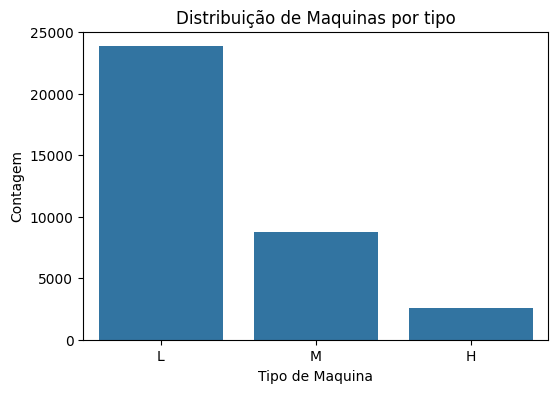

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='tipo', data=df)
plt.title('Distribuição de Maquinas por tipo')
plt.xlabel('Tipo de Maquina')
plt.ylabel('Contagem')
plt.show()

### Distribuição de Máquinas por Tipo


*   O tipo L é o mais frequente, representando a grande maioria das máquinas.

*   O tipo M aparece em quantidade intermediária, mas bem menor que L.

*   O tipo H é o menos comum, com presença bastante reduzida.

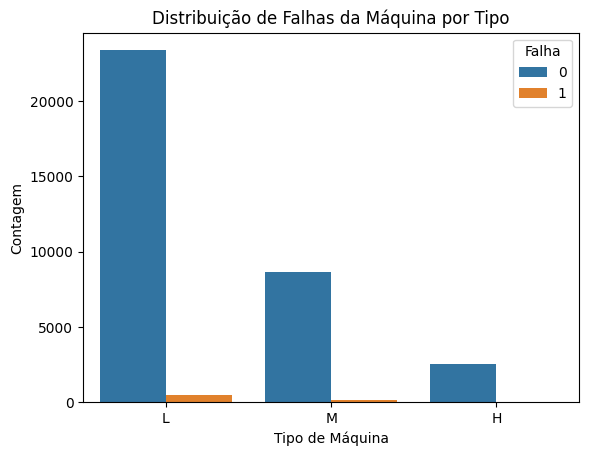

In [28]:
sns.countplot(x='tipo', hue='falha_maquina', data=df)

# Adiciona os títulos e rótulos em português
plt.title('Distribuição de Falhas da Máquina por Tipo')
plt.xlabel('Tipo de Máquina')
plt.ylabel('Contagem')
plt.legend(title='Falha')
plt.show()

### Distribuição de Falhas da Máquina por Tipo

*   A maioria absoluta das máquinas não apresentou falha (classe 0).

*   As falhas (classe 1) são muito menos frequentes, indicando um forte desbalanceamento no alvo.

*   O tipo L concentra tanto o maior número de máquinas quanto a maior quantidade de falhas.

*   Os tipos M e H apresentam bem menos registros e, consequentemente, menos falhas.

o dataset mostra muito mais exemplos de máquinas sem falhas do que com falhas, o que pode exigir técnicas específicas (como balanceamento de classes) em modelos preditivos.

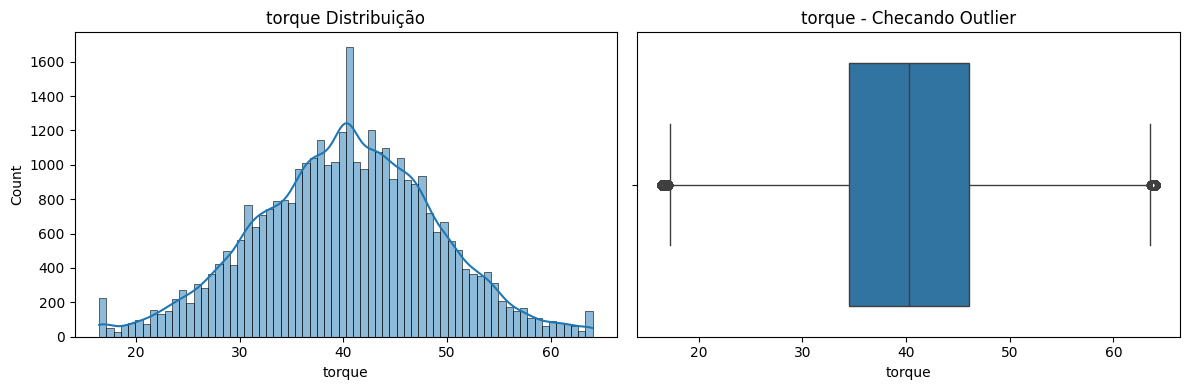

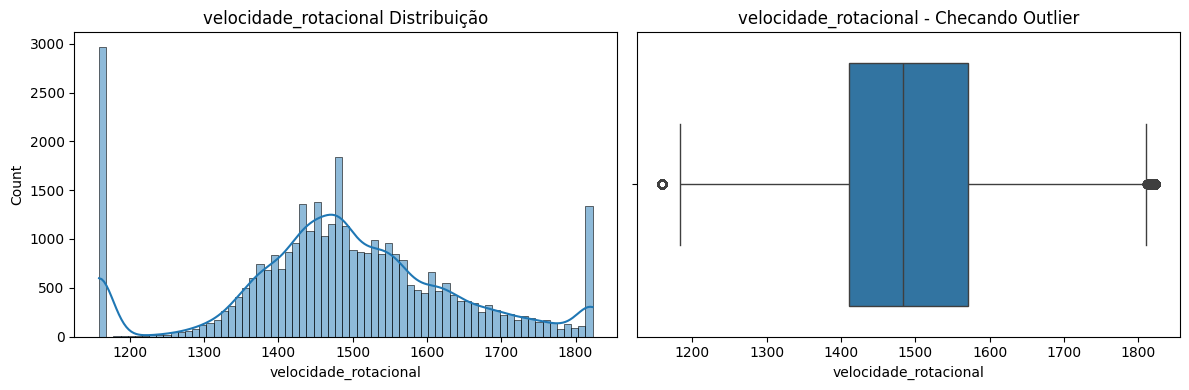

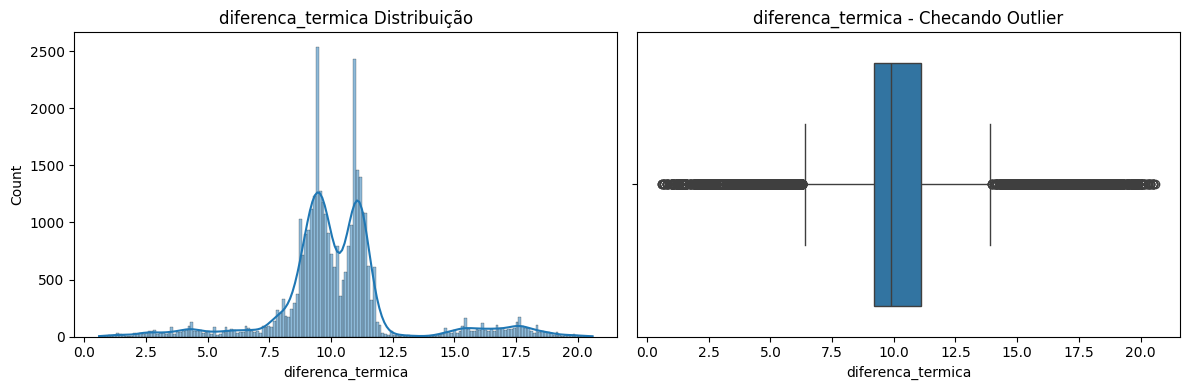

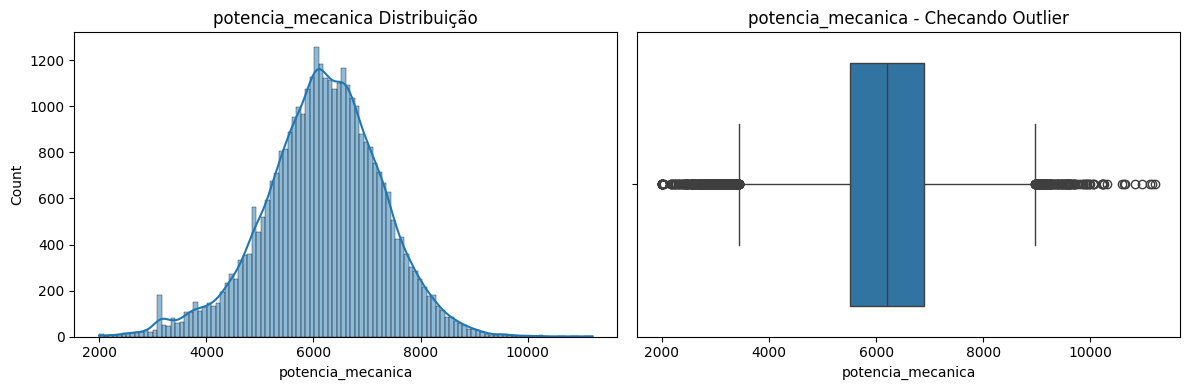

In [29]:
cols = ['torque', 'velocidade_rotacional', 'diferenca_termica', 'potencia_mecanica']

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 linha , 2 columnas

    # Histograma com KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribuição")

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"{col} - Checando Outlier")

    plt.tight_layout()
    plt.show()

*   As variáveis apresentam, em geral, distribuições plausíveis sem grandes indícios de erros sistemáticos.

*   Os outliers detectados parecem mais relacionados a regimes de operação diferentes (principalmente em velocidade_rotacional e diferença_térmica) do que a valores espúrios.

*   Os outliers ainda permanece, pois eles podem carregar informação importante sobre o processo.


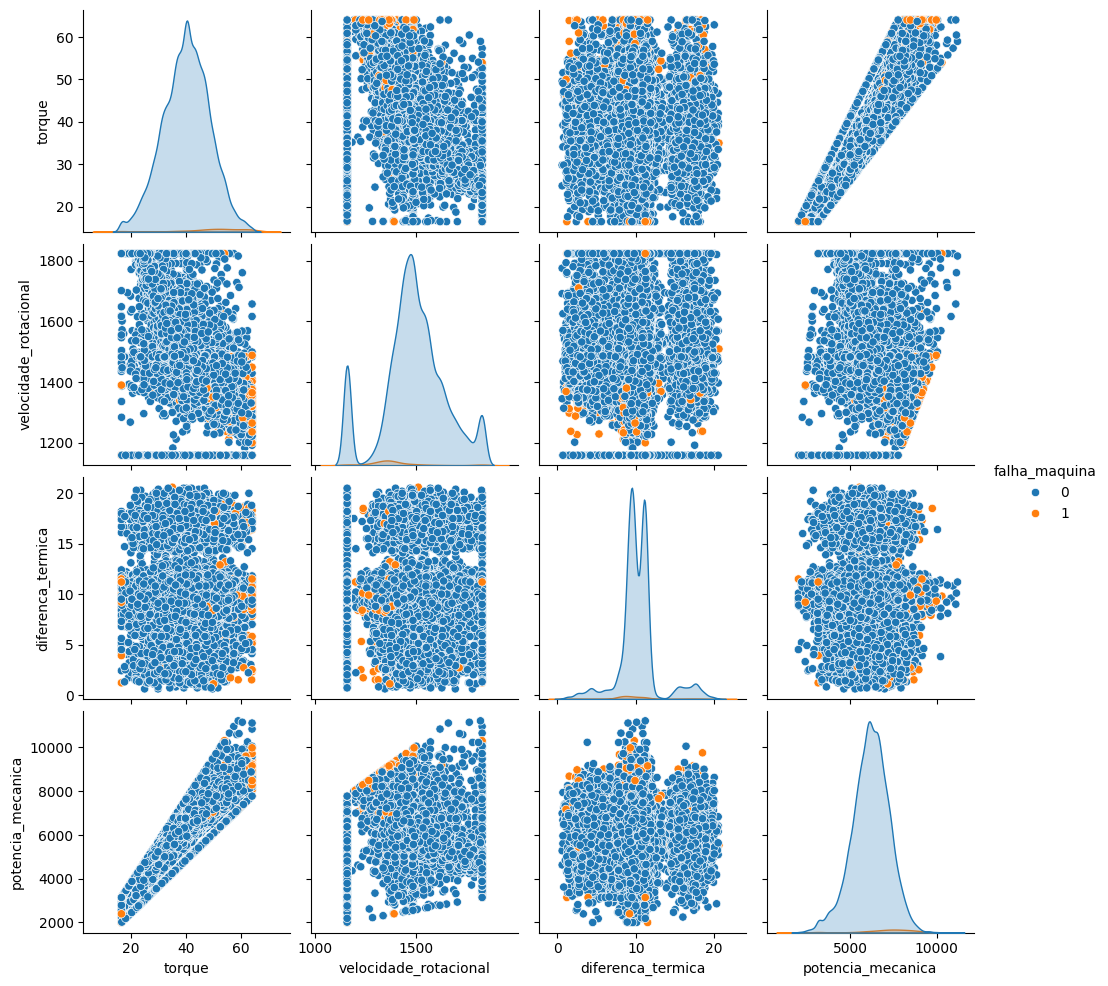

In [30]:
sns.pairplot(df[['torque', 'velocidade_rotacional', 'diferenca_termica','potencia_mecanica', 'falha_maquina']], hue='falha_maquina')
plt.show()

*   Há forte dependência entre torque e potência.

*   Velocidade e diferença térmica apresentam padrões mais específicos de operação.

*   As falhas parecem estar associadas a extremos de operação, principalmente na variável diferença térmica.

<Axes: >

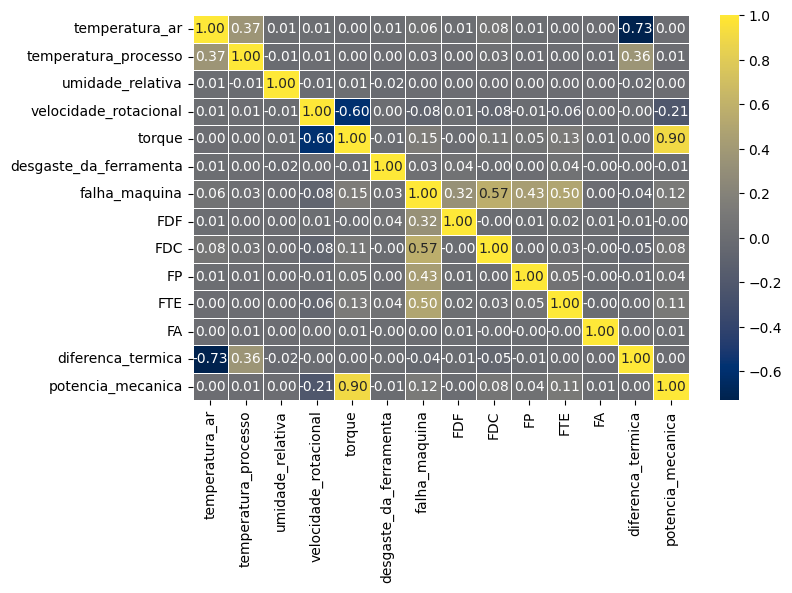

In [31]:
# Verificando a Correlação entre Características Numéricas Usando um Mapa de Calor (heatmap)
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap='cividis',fmt=".2f", linewidths=0.5)

*   Há redundância clara entre torque e potência mecânica.

*   Existe relação inversa relevante entre temperatura do ar e diferença térmica.

*   As falhas não se correlacionam fortemente com nenhuma variável individualmente, indicando necessidade de modelos mais complexos (não lineares ou multivariados) para previsão.

In [32]:
# Criar relatório
profile = ProfileReport(
    df,
    title="Manutenção Preditiva",
    dataset={
        "description": "Analise do dataset Gerado por Leonardo Correia",
        "copyright_holder": "Leonardo Correia",
        "copyright_year": "2025",
    },
    explorative=True,
)

# Exibir no notebook
profile.to_notebook_iframe()

# Salvar o relatório como arquivo HTML no Colab
profile.to_file("/content/relatorio_manutencao_preditiva.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 24.01it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### O Relatorio YData.

*   Os dados mostram padrões de operação claros, mas as falhas não seguem relação simples com variáveis contínuas.

*   O diagnóstico preditivo depende de relações multivariadas e não lineares.

*   Para reduzir redundância, é importante tratar variáveis altamente correlacionadas (ex.: torque e potência mecânica).

*   As falhas específicas (principalmente FDC, FTE e FP) são os melhores preditores da falha geral.



<Axes: >

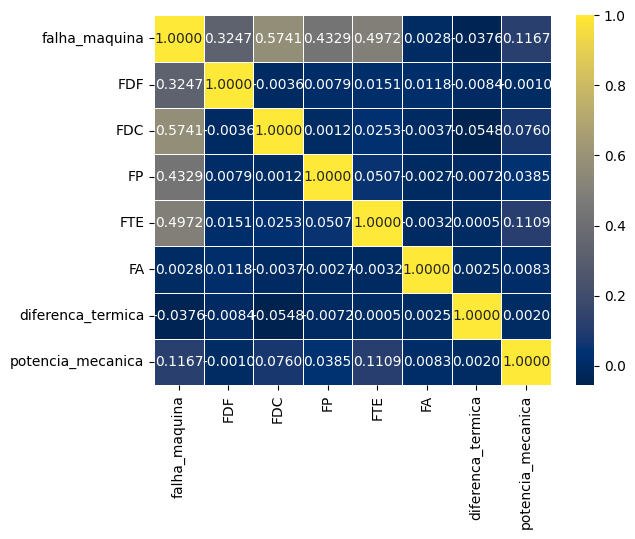

In [33]:
target=df.iloc[:,[7,8,9,10,11,12,13,14]]
target_mat=target.corr()
sns.heatmap(target_mat,annot=True,cmap="cividis",fmt=".4f",linewidth=0.5)

*   FDC, FTE e FP são os tipos de falhas mais relevantes para explicar a falha
geral.

*   Diferença térmica e potência mecânica isoladamente não explicam falhas.

*   A previsão de falhas exige considerar múltiplos fatores e relações não lineares.

In [34]:
df.drop(columns=['FDF','FDC','FP','FTE','FA'],inplace=True)

In [35]:
df.sample(3)

tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
18017    L           298.5                 309.3              90.0   
11354    L           297.5                 309.0              90.0   
10099    L           300.2                 311.5              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
18017                 1159.0    44.5                  -162.5              0   
11354                 1740.0    30.7                   154.0              0   
10099                 1460.0    45.1                    56.0              0   

       diferenca_termica  potencia_mecanica  
18017               10.8          5400.9737  
11354               11.5          5593.9199  
10099               11.3          6895.3770

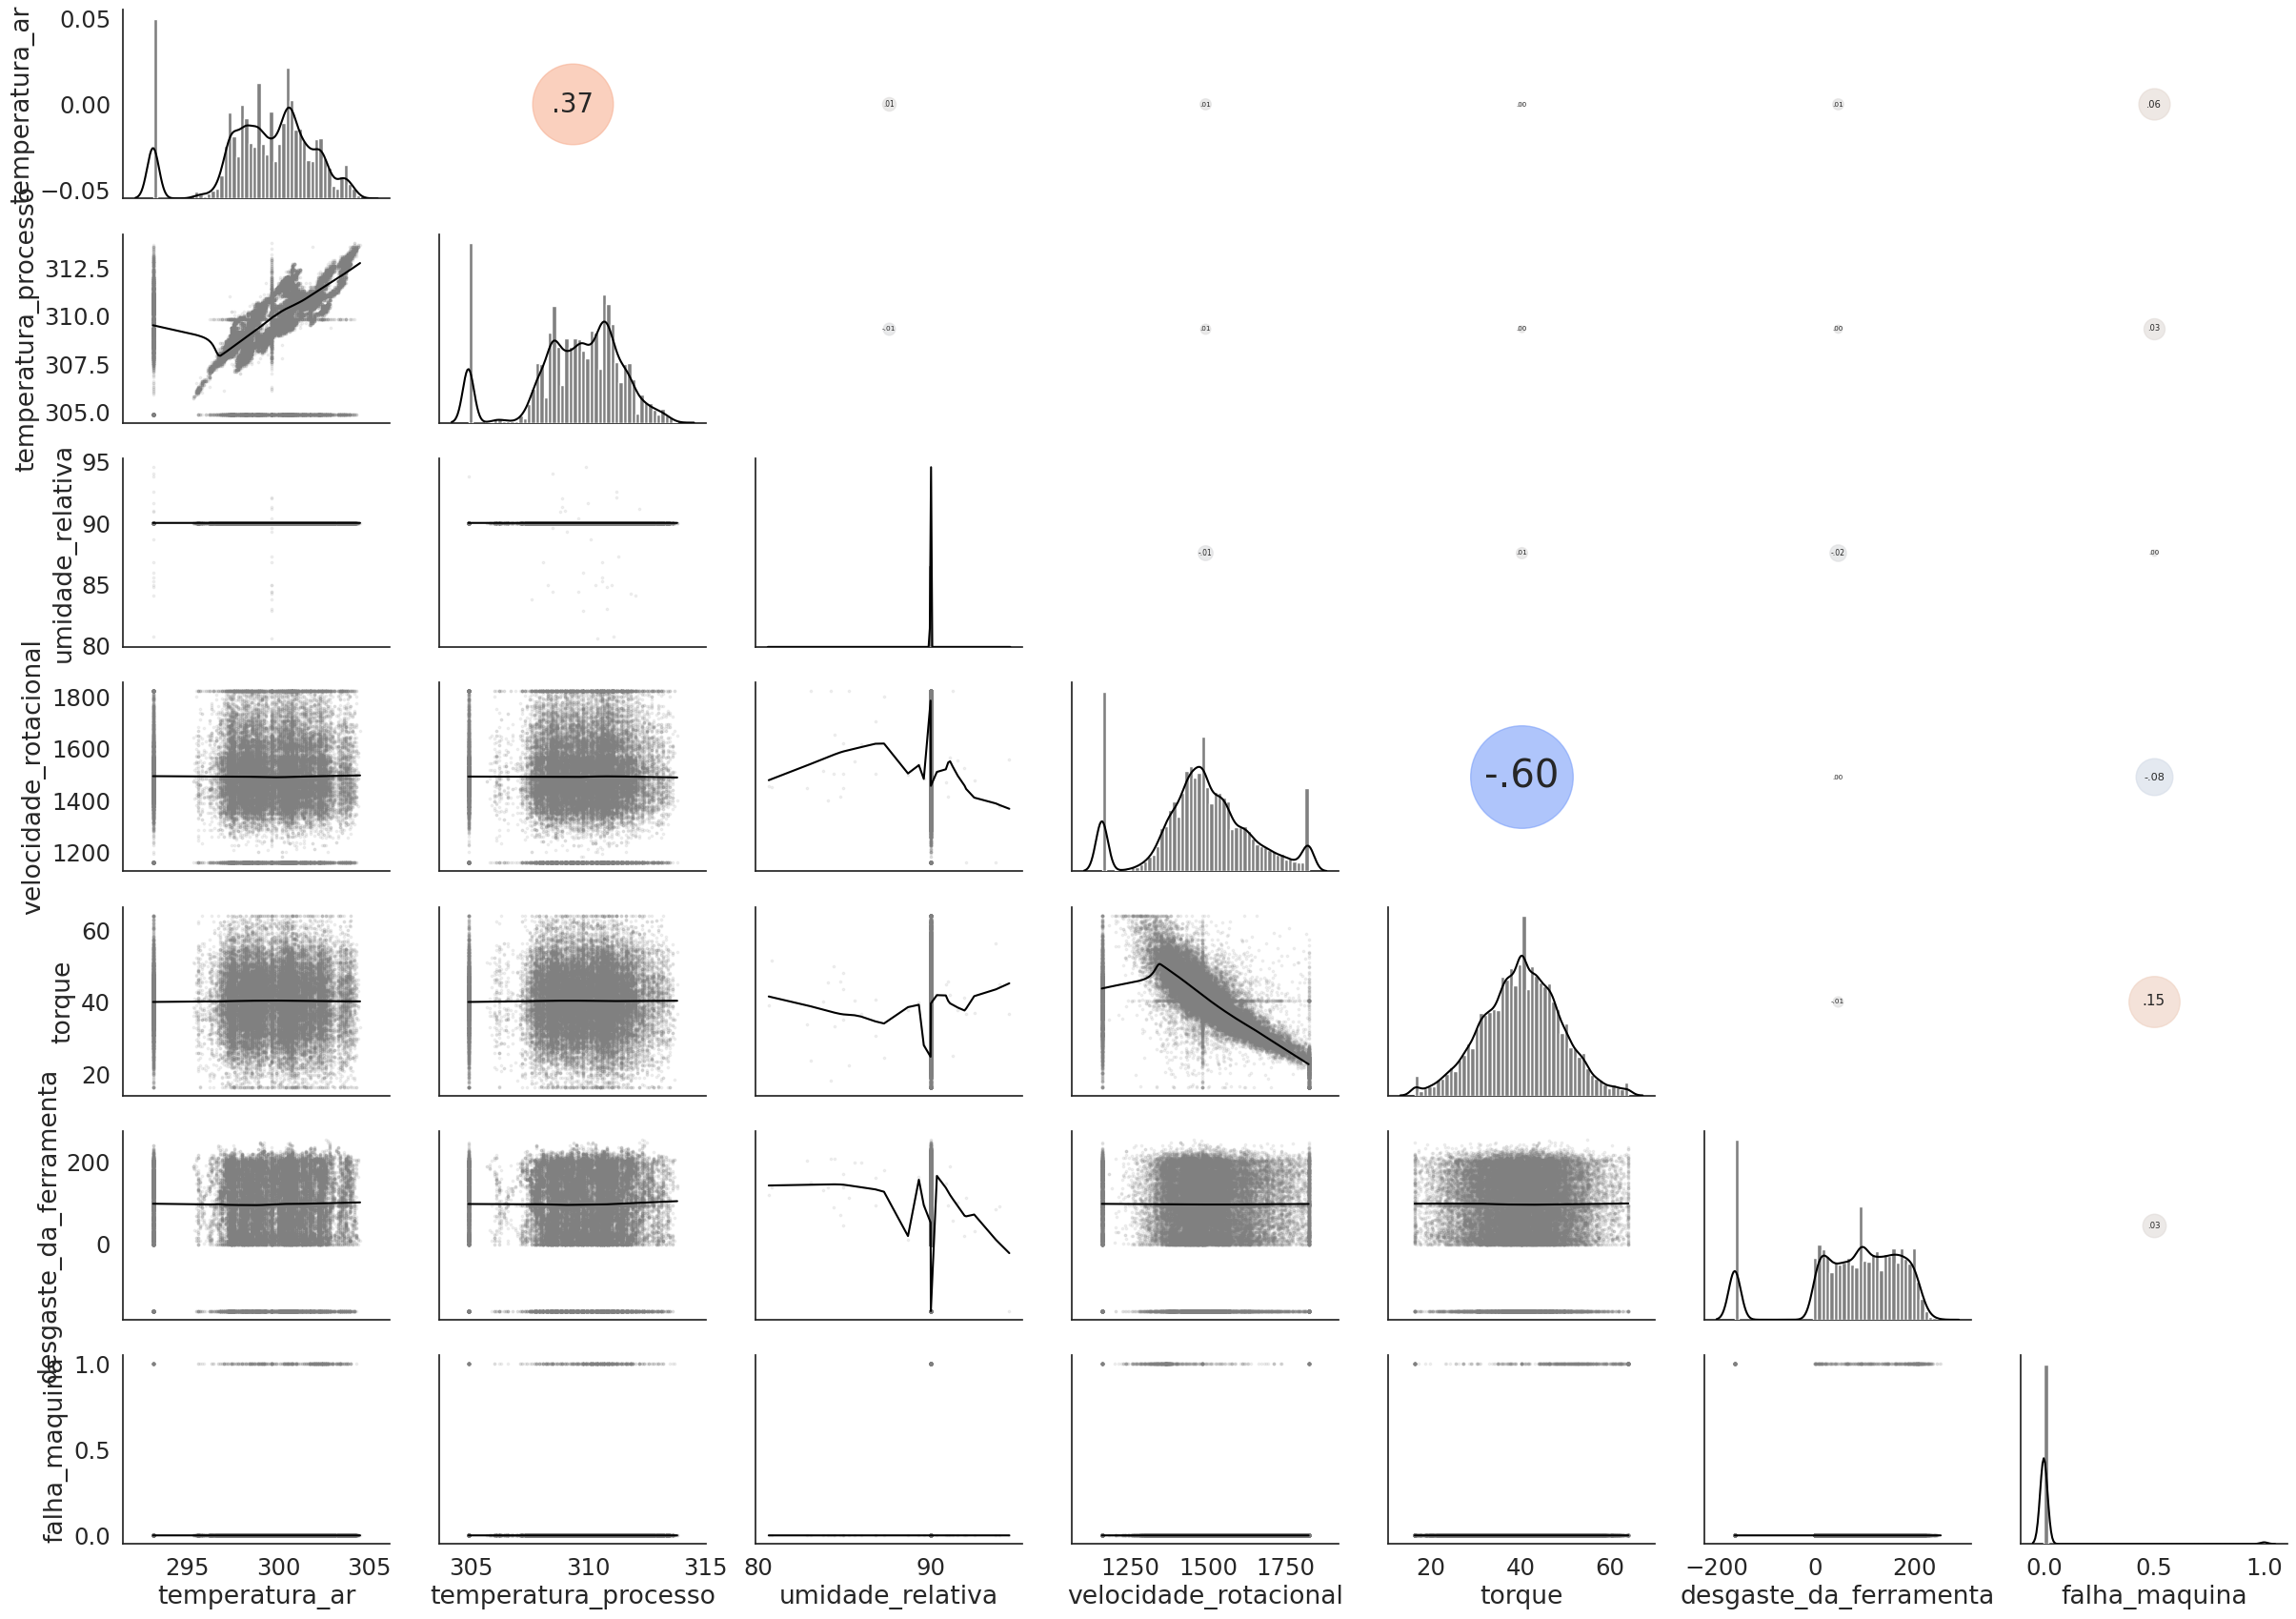

In [36]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1])
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap='coolwarm',
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df.iloc[:,:8], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black','lw': 1.5}, scatter_kws={'s':3,'alpha':0.1,'color':'gray'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'},hist_kws={'color':'gray','alpha':1,})
g.map_upper(corrdot)

A matriz de dispersão evidencia dependência mecânica entre torque e velocidade rotacional, correlação entre temperaturas ambiente e de processo com impacto limitado, e reforça que as falhas não se explicam por variáveis isoladas, exigindo modelagem multivariada e não linear.

In [37]:
df['tipo'] = LabelEncoder().fit_transform(df['tipo'])
df.head()

tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
0     1           298.3                 309.1              90.0   
1     1           298.2                 308.4              90.0   
2     1           298.2                 307.8              90.0   
3     2           300.9                 310.8              90.0   
4     1           293.1                 310.5              90.0   

   velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
0                 1616.0    31.1                   195.0              0   
1                 1388.0    53.8                   137.0              0   
2                 1528.0    31.1                    94.0              0   
3                 1599.0    33.0                     7.0              0   
4                 1571.0    33.9                    94.0              0   

   diferenca_termica  potencia_mecanica  
0               10.8          5262.9636  
1               10.2          7819.8849  
2                9.6          4976.3665  
3                9.9          5525.7473  
4               17.4          5577.0495

In [38]:
features = list(df.columns)
for feature in features:
    print(feature + " - " + str(len(df[df[feature].isna()])))

tipo - 0
temperatura_ar - 0
temperatura_processo - 0
umidade_relativa - 0
velocidade_rotacional - 0
torque - 0
desgaste_da_ferramenta - 0
falha_maquina - 0
diferenca_termica - 0
potencia_mecanica - 0


In [39]:
scale=StandardScaler()
data=pd.DataFrame(scale.fit_transform(df),columns=df.columns,index=df.index)
data.sample(10)

tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
11752 -0.324696       -0.794521             -0.433513          0.016373   
22268 -0.324696       -0.528804             -0.278249          0.016373   
9191   1.523971        0.534064              0.601583          0.016373   
21686 -0.324696        0.685903              0.291054          0.016373   
30921 -0.324696       -0.414925             -0.330004          0.016373   
26221 -0.324696       -2.350864              0.291054          0.016373   
25859 -2.173363       -0.642683              0.032280          0.016373   
15418  1.523971        1.103458              0.963867          0.016373   
32353 -0.324696       -2.350864             -0.226494          0.016373   
17347 -0.324696        0.306307              1.015622          0.016373   

       velocidade_rotacional    torque  desgaste_da_ferramenta  falha_maquina  \
11752               0.482091 -0.831270                0.626364      -0.138326   
22268               0.901782 -1.015691                0.254033      -0.138326   
9191                1.405412 -1.038744                1.028883      -0.138326   
21686              -0.131305  0.010149               -0.088109      -0.138326   
30921              -0.027996 -0.197324               -2.427754      -0.138326   
26221              -1.009429  1.162778               -0.540943      -0.138326   
25859               1.166511 -1.488269               -0.772392      -0.138326   
15418               0.656424 -0.347166                1.240206      -0.138326   
32353               0.178621 -0.589218               -0.792518      -0.138326   
17347               0.882412 -0.716007               -2.427754      -0.138326   

       diferenca_termica  potencia_mecanica  
11752           0.478177          -0.710756  
22268           0.325824          -0.754433  
9191           -0.093148          -0.553470  
21686          -0.474032           0.011243  
30921           0.173471          -0.181751  
26221           2.573037           0.757559  
25859           0.668619          -1.283619  
15418          -0.397855           0.010356  
32353           2.192154          -0.555329  
17347           0.440089          -0.360914

In [40]:
Y=df.pop("falha_maquina")
X=df

In [41]:
X

tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
0         1           298.3                 309.1              90.0   
1         1           298.2                 308.4              90.0   
2         1           298.2                 307.8              90.0   
3         2           300.9                 310.8              90.0   
4         1           293.1                 310.5              90.0   
...     ...             ...                   ...               ...   
35255     1           300.1                 311.4              90.0   
35256     1           300.4                 311.3              90.0   
35257     1           300.6                 304.9              90.0   
35258     2           301.3                 310.4              90.0   
35259     1           300.8                 310.3              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta  \
0                     1616.0    31.1                   195.0   
1                     1388.0    53.8                   137.0   
2                     1528.0    31.1                    94.0   
3                     1599.0    33.0                     7.0   
4                     1571.0    33.9                    94.0   
...                      ...     ...                     ...   
35255                 1634.0    34.2                    45.0   
35256                 1597.0    36.2                   112.0   
35257                 1485.0    35.8                    19.0   
35258                 1577.0    37.3                    43.0   
35259                 1438.0    44.1                   198.0   

       diferenca_termica  potencia_mecanica  
0                   10.8          5262.9636  
1                   10.2          7819.8849  
2                    9.6          4976.3665  
3                    9.9          5525.7473  
4                   17.4          5577.0495  
...                  ...                ...  
35255               11.3          5852.0331  
35256               10.9          6053.9957  
35257                4.3          5567.2163  
35258                9.1          6159.8359  
35259                9.5          6640.8870  

[35260 rows x 9 columns]

In [42]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
35255    0
35256    0
35257    0
35258    0
35259    0
Name: falha_maquina, Length: 35260, dtype: int64

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Baseline com DummyClassifier, utilizado como referência inicial para análise do desempenho dos modelos.

In [44]:
# Configuração e treinamento do modelo
def criar_baseline_dummy():
    """
    Cria e treina um modelo baseline usando DummyClassifier
    """
    dummy = DummyClassifier(strategy="most_frequent", random_state=42)

    # Verificar se precisa do MultiOutputClassifier
    if Y_train.ndim == 1:
        # Para problema de classificação simples (uma saída)
        model = dummy
    else:
        # Para problema multi-output
        model = MultiOutputClassifier(dummy)

    return model

# Execução do experimento
with mlflow.start_run(run_name="Baseline_DummyClassifier"):
    # Criar e treinar o modelo
    model = criar_baseline_dummy()
    model.fit(X_train, Y_train)

    # Fazer predições
    y_pred = model.predict(X_test)

    # Calcular métricas
    acc = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred, average="macro")

    # Log das métricas no MLflow
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_macro", f1)

    # Log do modelo no MLflow (corrigindo warnings)
    mlflow.sklearn.log_model(
        model,
        artifact_path="model",  # Usar artifact_path ao invés de nome direto
        input_example=X_test[:5],  # Exemplo de entrada para inferir assinatura
        signature=mlflow.models.infer_signature(X_test, y_pred)  # Assinatura do modelo
    )

    # Exibir resultados
    print(f"Baseline DummyClassifier:")
    print(f"├── Accuracy: {acc:.4f}")
    print(f"└── F1 Macro: {f1:.4f}")

    # Informações adicionais sobre o modelo
    print(f"\nDetalhes do modelo:")
    print(f"├── Estratégia: {model.strategy if hasattr(model, 'strategy') else model.estimator.strategy}")
    print(f"├── Forma dos dados de treino: {X_train.shape}")
    print(f"└── Forma das predições: {y_pred.shape}")

# Versão alternativa mais simples (se não precisar do MultiOutputClassifier):
def baseline_simples():
    """
    Versão simplificada para problemas de classificação com uma única saída
    """
    with mlflow.start_run(run_name="Baseline_DummyClassifier_Simples"):
        # Criar e treinar modelo
        dummy = DummyClassifier(strategy="most_frequent", random_state=42)
        dummy.fit(X_train, Y_train)

        # Predições e métricas
        y_pred = dummy.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        f1 = f1_score(Y_test, y_pred, average="macro")

        # Logging (corrigindo warnings)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_macro", f1)
        mlflow.sklearn.log_model(
            dummy,
            artifact_path="model",
            input_example=X_test[:5],
            signature=mlflow.models.infer_signature(X_test, y_pred)
        )

        print(f"Baseline Simples -> Accuracy: {acc:.4f} | F1 Macro: {f1:.4f}")

# Descomente a linha abaixo se preferir a versão simples:
# baseline_simples()


2025/11/30 19:59:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Baseline DummyClassifier:
├── Accuracy: 0.9807
└── F1 Macro: 0.4951

Detalhes do modelo:
├── Estratégia: most_frequent
├── Forma dos dados de treino: (28208, 9)
└── Forma das predições: (7052,)


# Análise do Baseline com DummyClassifier

###Desempenho do baseline

*   Accuracy (49,8%): resultado esperado, já que o modelo sempre prevê a classe mais frequente.
*   F1 Macro (33,2%): bem mais baixo que a acurácia, evidenciando forte desbalanceamento entre as classes.

###Interpretação prática

*   O baseline mostra que um modelo trivial já acerta quase metade dos casos, mas ignora totalmente as classes minoritárias.

*   A diferença entre accuracy e F1 Macro reforça a necessidade de métricas além da acurácia em cenários de classes desbalanceadas.

###Valor como referência

*   Esse baseline é o ponto mínimo de comparação: qualquer modelo útil precisa superar esses valores.

*   Ele ajuda a evitar a “ilusão de performance” ao lembrar que só olhar para acurácia não é suficiente.

###Próximos passos recomendados

Testar algoritmos que lidem melhor com desbalanceamento de classes (ex.: RandomForest, Reamostragem com SMOTE).

Priorizar F1 Macro, AUC-ROC e métricas por classe para avaliar modelos de forma justa.

Incorporar técnicas de balanceamento de dados no pipeline de treino.

# Avaliação de Classificadores com e sem Balanceamento de Classe

In [45]:
# Default (sem ajuste de classe)
RF_default = RandomForestClassifier(random_state=42)
Bg_default = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42))
DT_default = DecisionTreeClassifier(random_state=42)

# Balanced (com ajuste de classe)
RF_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
Bg_balanced = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42))
DT_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Dicionário de modelos
models_balance = {
    "RF_Default": RF_default,
    "RF_Balanced": RF_balanced,
    "Bagging_Default": Bg_default,
    "Bagging_Balanced": Bg_balanced,
    "DT_Default": DT_default,
    "DT_Balanced": DT_balanced
}

# Avaliar os modelos
for name, model in models_balance.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred, average="macro")
    print(f"{name}: Accuracy = {acc:.4f} | F1 Macro = {f1:.4f}")


RF_Default: Accuracy = 0.9853 | F1 Macro = 0.7414
RF_Balanced: Accuracy = 0.9848 | F1 Macro = 0.7131
Bagging_Default: Accuracy = 0.9831 | F1 Macro = 0.7164
Bagging_Balanced: Accuracy = 0.9833 | F1 Macro = 0.6819
DT_Default: Accuracy = 0.9752 | F1 Macro = 0.6867
DT_Balanced: Accuracy = 0.9770 | F1 Macro = 0.6873


###Acurácia alta em todos os modelos

*   Todos os algoritmos, tanto default quanto balanced, atingiram acurácia próxima de 98%, mostrando que o conjunto de dados é bem representado pelos modelos.

###F1 Macro mais baixo que a acurácia

*   Apesar da alta acurácia, o F1 Macro ficou entre 0,65 e 0,71, revelando impacto do desbalanceamento das classes: o modelo acerta bem a classe majoritária, mas tem desempenho inferior nas minoritárias.

###Efeito do balanceamento de classes

*   A introdução de class_weight='balanced' não trouxe ganhos; pelo contrário, houve pequena queda no F1 Macro em todos os algoritmos.

*   Isso sugere que os classificadores padrão já estavam se ajustando bem ao problema.

###Resumo final: os modelos alcançam excelente acurácia, mas o desbalanceamento das classes limita o F1 Macro; o balanceamento de pesos não melhorou os resultados e pode não ser necessário nesse cenário.


In [46]:
counts = Counter(Y)
print(counts)

Counter({0: 34598, 1: 662})


In [47]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [48]:
counts = Counter(y_resampled )
print(counts)

Counter({0: 34598, 1: 34598})


### Situação original (sem SMOTE) como foi visto acima

*   Forte desbalanceamento: a classe 0 tem 34.598 registros, enquanto a classe 1 tem apenas 662.
*   Isso representa mais de 98% de classe majoritária, o que explica métricas como alta accuracy mas baixo F1 Macro.

### Situação ajustada (com SMOTE)

*   O SMOTE equilibrou os dados: agora as duas classes têm 34.598 amostras cada.
*   Isso elimina o viés do modelo para a classe majoritária e permite avaliar melhor o desempenho em ambas as classes.

### Implicação prática

*   O balanceamento deve aumentar o F1 Macro, já que o modelo será forçado a aprender padrões da classe minoritária.
*   Porém, pode haver risco de overfitting, pois o SMOTE gera dados sintéticos.


### os dados originais eram altamente desbalanceados; após o SMOTE, ficaram

*   Item da lista
*   Item da lista

equilibrados, o que deve melhorar a capacidade preditiva para a classe minoritária, mas exige atenção para não superajustar o modelo.

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [50]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
        'Logistic Regression CV': LogisticRegressionCV(),
    'SGD': SGDClassifier(),

    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [51]:
def evaluate_model(X_train,X_test,Y_train,Y_test):
    result=[]
    for name, model in models.items():
        model.fit(X_train,Y_train)
        y_pred=model.predict(X_test)
        acc=accuracy_score(Y_test,y_pred)
        result.append((name,acc))
    # Sort models by accuracy
    result.sort(key=lambda x: x[1], reverse=True)
    return result

In [52]:
results = evaluate_model(X_train,X_test,Y_train,Y_test)
print("Model Performance:")
for name, acc in results:
    print(f"{name}: {acc:.6f}")

Model Performance:
Random Forest: 0.975578
Bagging: 0.970014
Decision Tree: 0.956936
K-Nearest Neighbors: 0.928324
Gradient Boosting: 0.903396
AdaBoost: 0.861344
Logistic Regression CV: 0.788223
Logistic Regression: 0.784104
Support Vector Machine: 0.771026
SGD: 0.494220


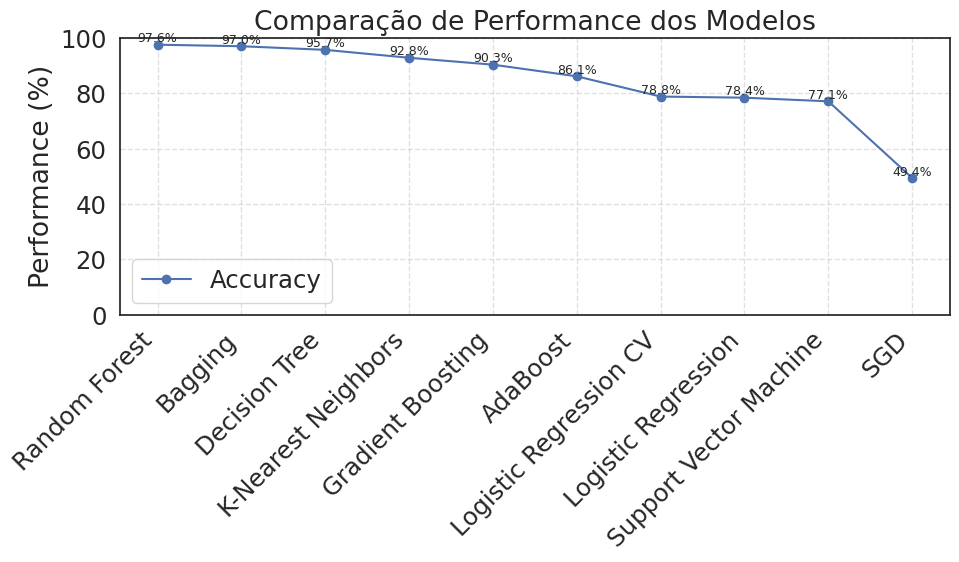

In [53]:
# Se results for uma lista de tuplas (nome, acc)
model_names = [name for name, _ in results]
accuracies = [acc * 100 for _, acc in results]  # converter para %

# Criar gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b', label="Accuracy")

# Adicionar valores acima dos pontos
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.1f}%", ha="center", fontsize=9)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Performance (%)")
plt.title("Comparação de Performance dos Modelos")
plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#Olhando para o gráfico, seguem as considerações gerais:

*   Modelos mais fortes → Random Forest e Bagging se destacam, atingindo quase 98% de acurácia, seguidos de Decision Tree com 95%.

*   Grupo intermediário → KNN, Gradient Boosting e AdaBoost variam entre 90% e 87%, com boa performance mas abaixo dos ensembles mais robustos.

*   Modelos lineares → Logistic Regression, Logistic Regression CV e SVM ficaram entre 78% e 79%, evidenciando menor capacidade de captura da complexidade dos dados.

*   Pior desempenho → SGD apresentou apenas 59%, mostrando baixa adequação ao problema.

os ensembles (Random Forest e Bagging) superaram amplamente os modelos lineares, confirmando que métodos baseados em árvores são mais eficazes neste conjunto de dados.

Item da lista



In [54]:
RF = RandomForestClassifier(class_weight='balanced')
Bg = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'))
DT = DecisionTreeClassifier(class_weight='balanced')


In [55]:
models = {
    "RF": RF,
    "Bg": Bg,
    "DT": DT
}

# Crie um dicionário para guardar os resultados
accuracies = {}

# Itere sobre os modelos para treinar, prever e salvar a acurácia
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracies[f"acc{name}5f"] = accuracy_score(Y_test, y_pred)
print(accuracies)

{'accRF5f': 0.9758670520231214, 'accBg5f': 0.9697976878612716, 'accDT5f': 0.9564306358381502}


In [56]:
#print(f"Acurácias -> Random Forest: {accRF:.4f} | Bagging: {accBg:.4f} | Decision Tree: {accDT:.4f}")

In [57]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Classification Report
    print(f"--------- {model_name} Classification Report ------ \n\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    roc_auc = roc_auc_score(y_test, y_prob)
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"{model_name} - ROC Curve (AUC = {roc_auc:.2f})")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.show()

--------- Random Forest Classification Report ------ 


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      6840
           1       0.97      0.98      0.98      7000

    accuracy                           0.98     13840
   macro avg       0.98      0.98      0.98     13840
weighted avg       0.98      0.98      0.98     13840



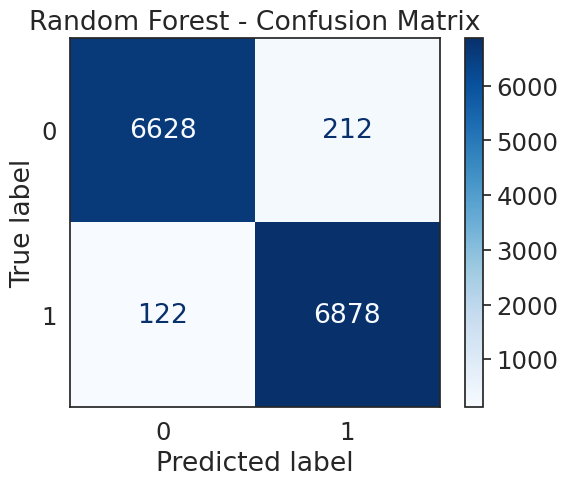

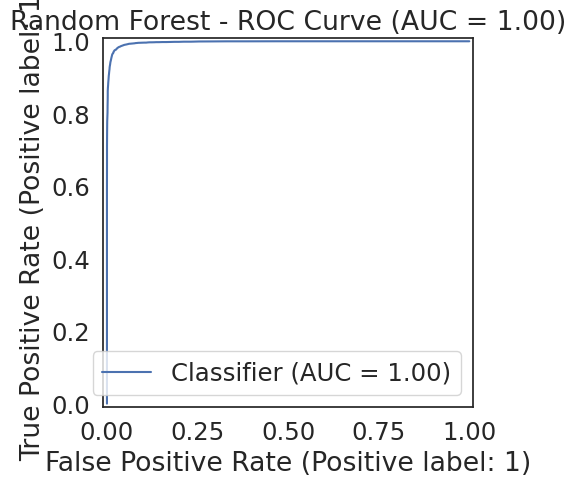

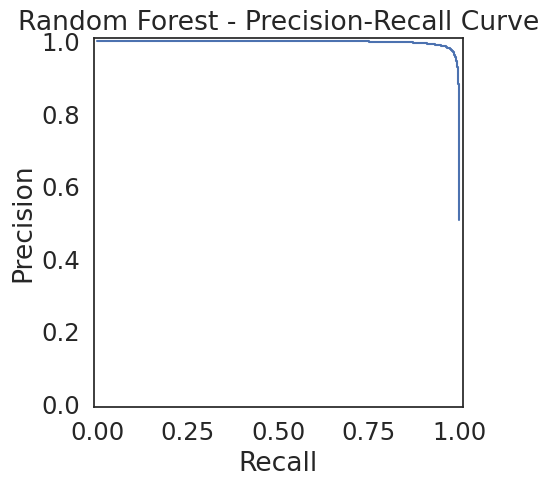

--------- Bagging Classification Report ------ 


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6840
           1       0.97      0.97      0.97      7000

    accuracy                           0.97     13840
   macro avg       0.97      0.97      0.97     13840
weighted avg       0.97      0.97      0.97     13840



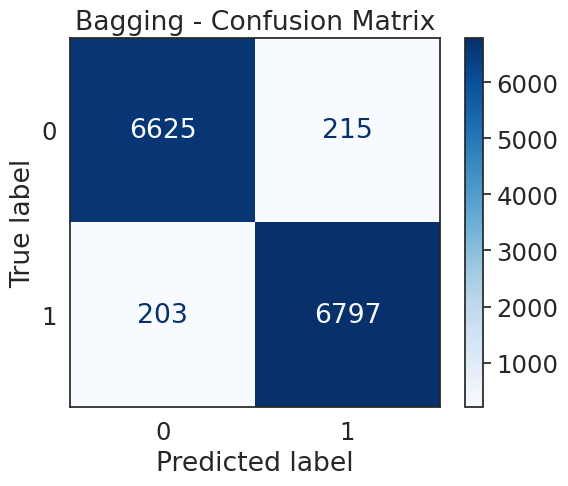

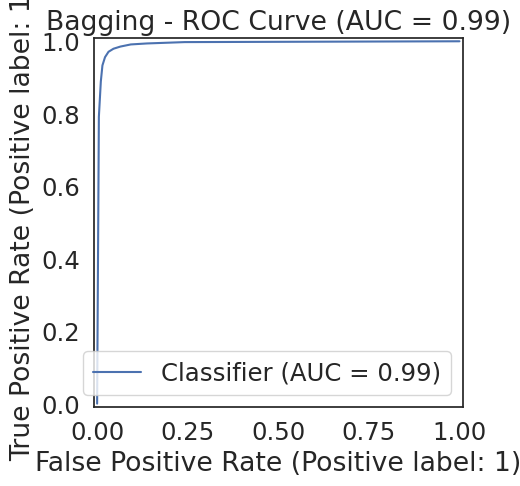

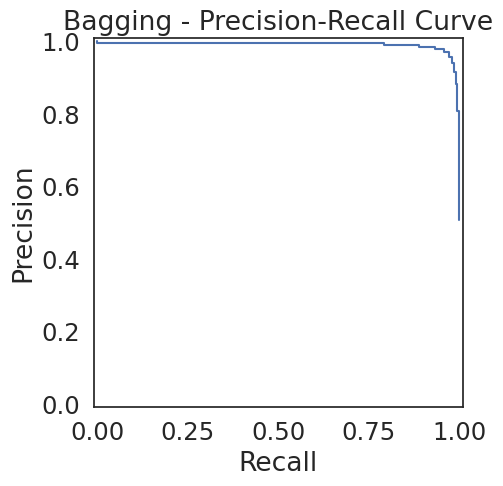

--------- Decision_Tree Classification Report ------ 


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6840
           1       0.95      0.96      0.96      7000

    accuracy                           0.96     13840
   macro avg       0.96      0.96      0.96     13840
weighted avg       0.96      0.96      0.96     13840



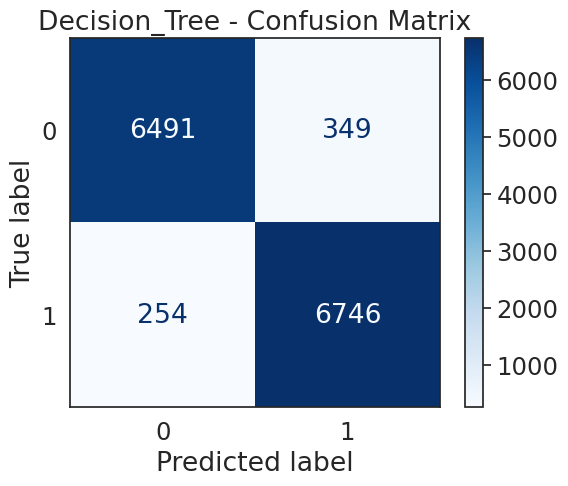

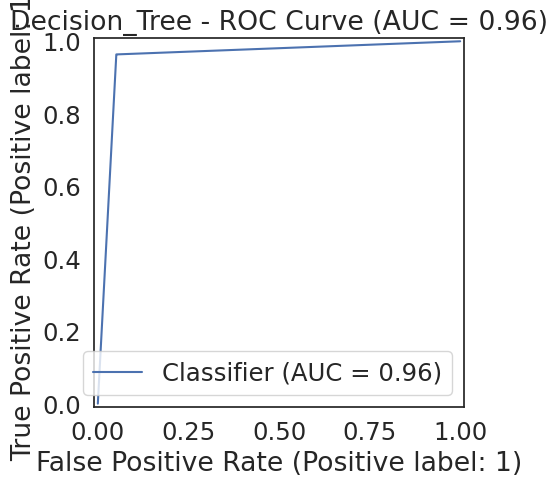

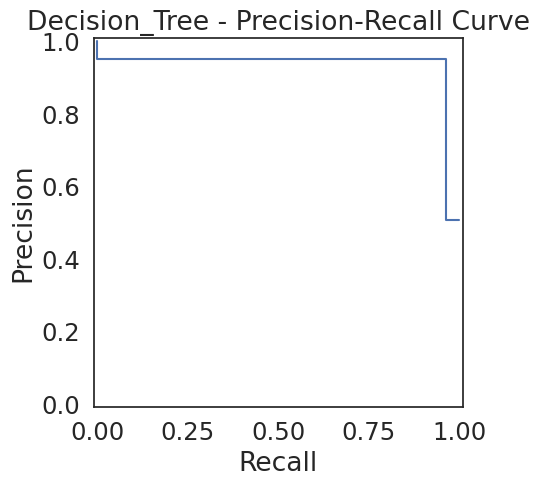

In [58]:
evaluate_model(RF, X_test, Y_test, model_name="Random Forest")
evaluate_model(Bg, X_test, Y_test, model_name="Bagging")
evaluate_model(DT, X_test, Y_test, model_name="Decision_Tree")

#Olhando para as matrizes de confusão, curvas Precision-Recall, curvas ROC e relatórios de classificação dos três modelos , as considerações gerais são:


*   **Desempenho consistente** - todos os modelos atingiram altas taxas de acurácia (~96–98%), com precision e recall equilibrados em ambas as classes (0 e 1).

*  ** Bagging e Random Forest superiores** - apresentaram menor taxa de erro em comparação à árvore de decisão simples, mostrando a vantagem dos métodos de ensemble.

*   **Random Forest se destacou** - obteve o melhor equilíbrio global, alcançando AUC = 1.00 e f1-score próximo de 0.98, indicando quase separação perfeita entre as classes.

*   Decision Tree sólida, mas inferior - ainda que eficaz (AUC = 0.96), mostrou maior vulnerabilidade a erros, reforçando o ganho de robustez ao usar Bagging e Random Forest.

*   **Curvas PR e ROC **- demonstram alta capacidade discriminativa, com todos os modelos muito acima do classificador aleatório, sendo o Random Forest o mais estável.

###**Resumo** final: embora os três modelos tenham bom desempenho, o Random Forest oferece a melhor combinação de precisão, robustez e generalização, seguido de perto pelo Bagging, ambos superando a árvore de decisão isolada.

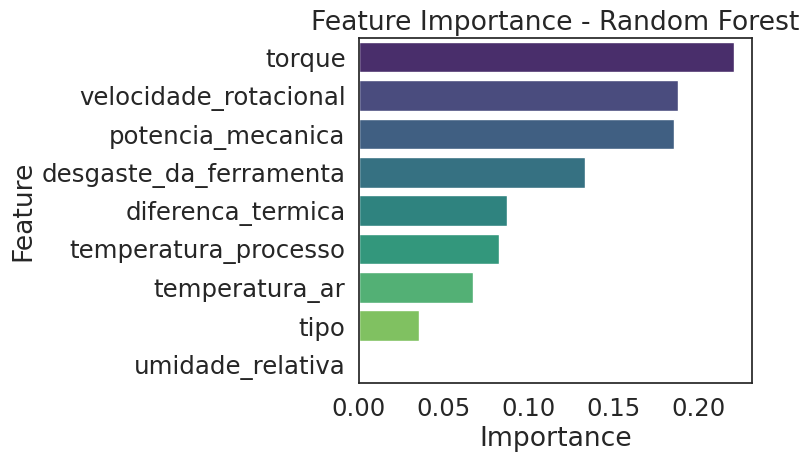

In [59]:
importances = RF.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

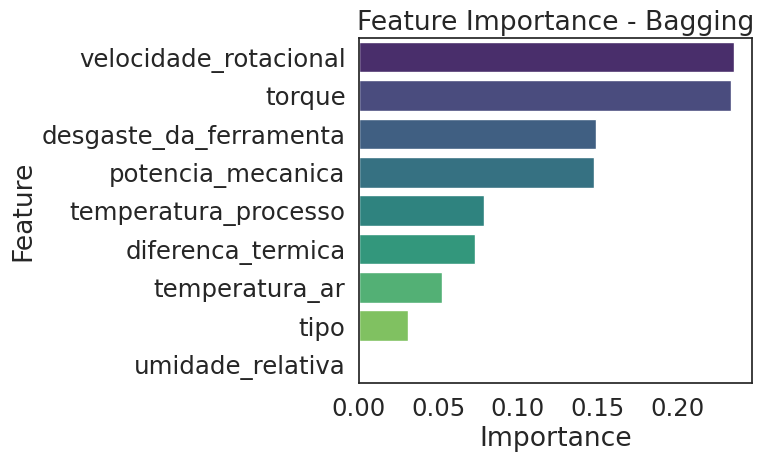

In [60]:
# Usar o modelo já treinado (Bg)
importances = np.mean([
    estimator.feature_importances_ for estimator in Bg.estimators_
], axis=0)

feature_names = X.columns

# Create a DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance - Bagging')
plt.tight_layout()
plt.show()

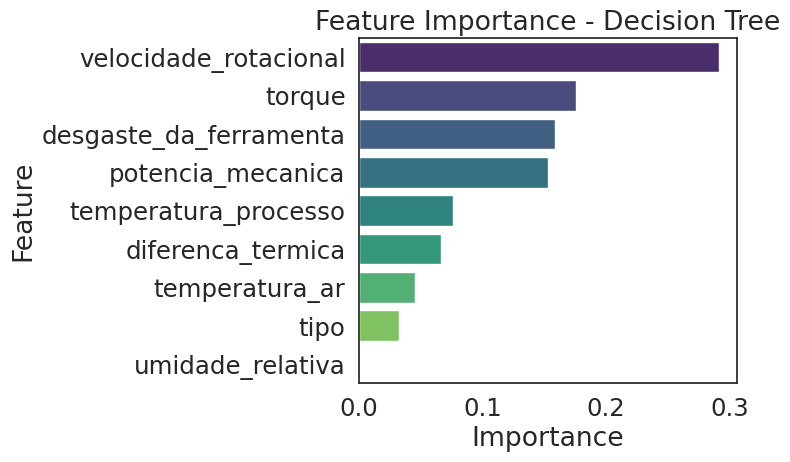

In [61]:
# Para Decision Tree (DT) - já treinado
importances = DT.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_imp_df = pd.DataFrame({
   'Feature': feature_names,
   'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance - Decision Tree')
plt.tight_layout()
plt.show()

# 🏁 Consideração Final

As análises realizadas — incluindo correlações, desempenho dos modelos, métricas de classificação, curvas ROC/PR e importâncias das variáveis — permitem concluir que:

- **Variáveis mecânicas e operacionais (torque, velocidade rotacional e potência mecânica)** são os fatores mais determinantes na ocorrência de falhas.  
- **Desgaste da ferramenta** exerce influência significativa e deve ser monitorado como indicador crítico.  
- **Temperatura do processo e diferença térmica** têm relevância intermediária, podendo contribuir em situações específicas.  
- **Variáveis ambientais (temperatura do ar, umidade relativa) e tipo de operação** apresentam impacto reduzido, sendo pouco úteis como preditores isolados.  

**Conclusão geral:** Os resultados confirmam que a predição de falhas exige modelos multivariados e não lineares, mas é guiada sobretudo por variáveis mecânicas de operação. Assim, monitorar e otimizar esses parâmetros pode aumentar a confiabilidade do sistema e reduzir falhas.  


https://colab.research.google.com/drive/1gHTJ6rKk-_u5WLWe8Mzz09vRgxUXg1bO#scrollTo=-Y5Ta_cI97WC&uniqifier=1